In [1]:
from google.colab import files
uploaded = files.upload()


Saving TelecomX_Data_tratado.csv to TelecomX_Data_tratado.csv


Formato do dataset: (7043, 21)
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Após mapeamento:
Churn
0    5174
1    1869
Name: count, dtype: int64
Dimensão após encoding: (7043, 30)
Treino: (5634, 30) Teste: (1409, 30)
=== Regressão Logística ===
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409

ROC AUC: 0.8431747138908263

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1035
           1       0.65      0.49      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409

ROC AUC: 0.8218553824691932


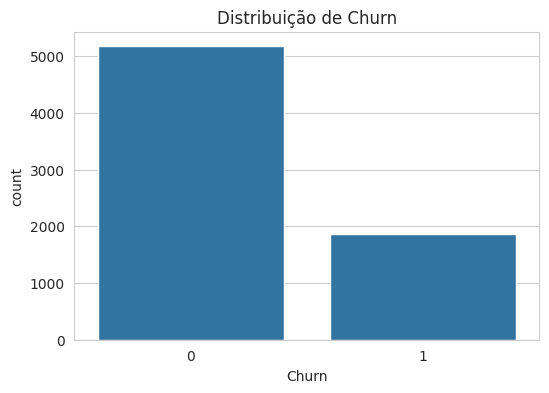

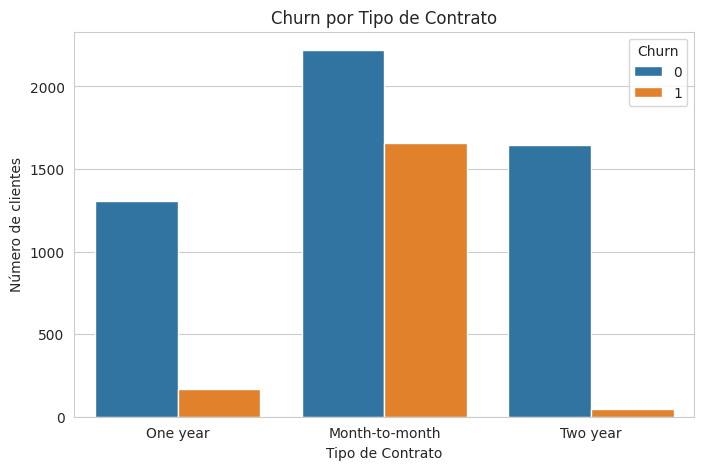

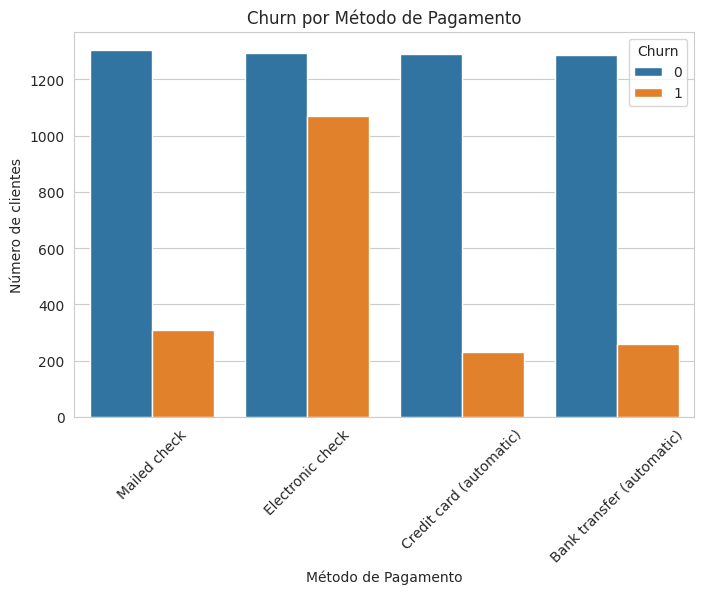

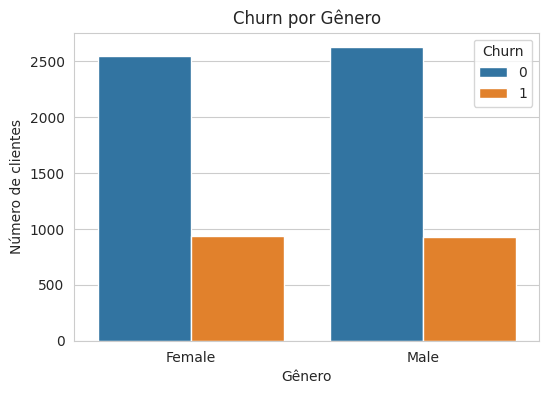

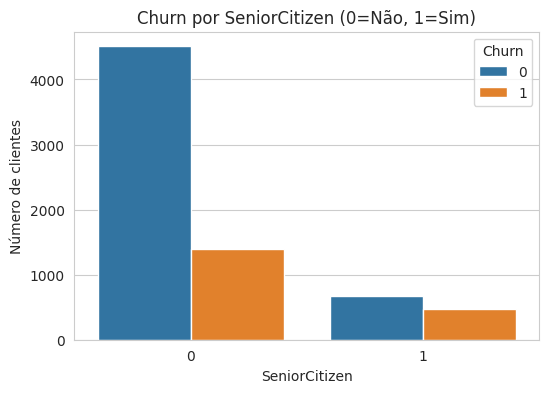

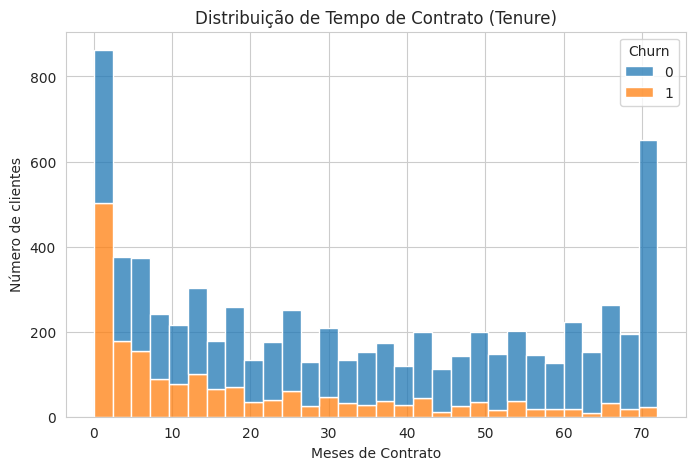

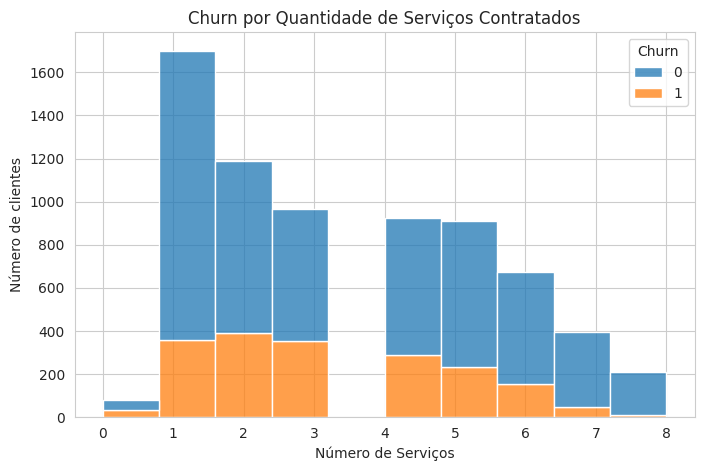

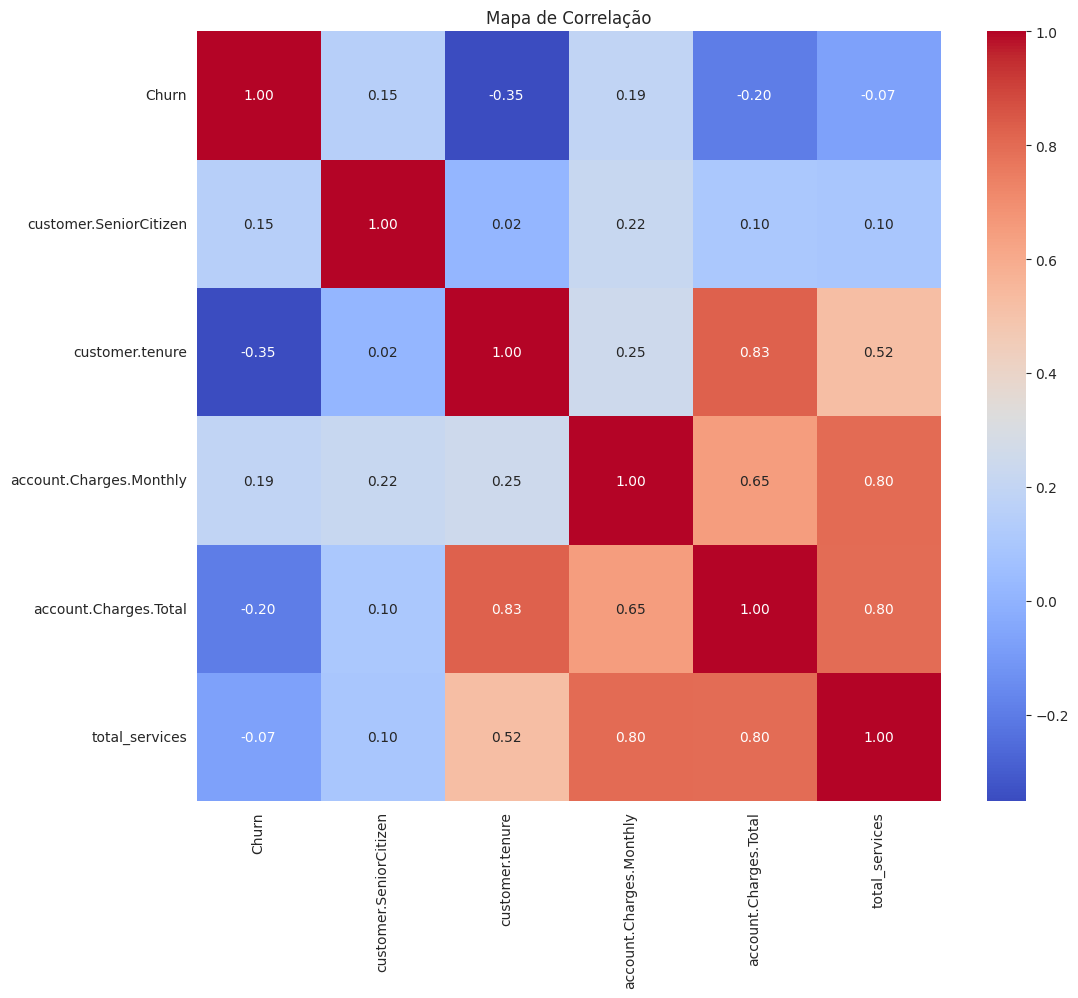

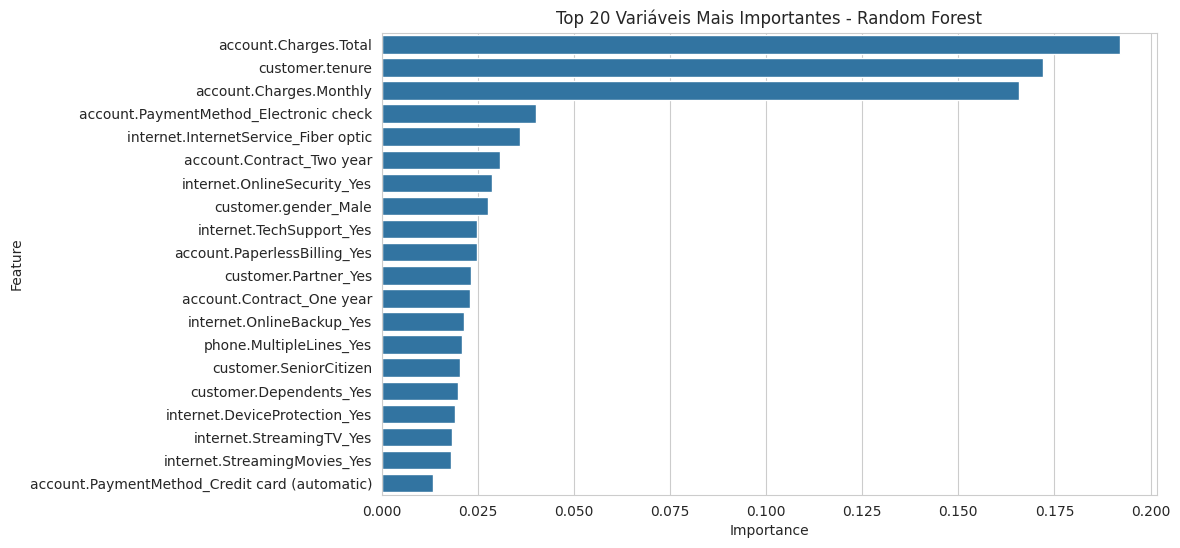


Top 5 fatores que influenciam churn:
- account.Charges.Total: importância 0.192
- customer.tenure: importância 0.172
- account.Charges.Monthly: importância 0.166
- account.PaymentMethod_Electronic check: importância 0.040
- internet.InternetService_Fiber optic: importância 0.036

Recomendações estratégicas:
- Incentivar contratos mais longos (1 ano ou anual).
- Alertas ou campanhas para clientes que utilizam pagamento eletrônico.
- Oferecer serviços de suporte técnico e backup online.
- Monitoramento contínuo dos clientes com alto risco de churn.
- Focar em clientes com maior quantidade de serviços contratados e tenure baixo.



In [3]:
# ==========================================
# Telecom X – Previsão de Churn (Versão Premium)
# ==========================================

# -------------------------------
# 1️⃣ Bibliotecas
# -------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

sns.set_style("whitegrid")

# -------------------------------
# 2️⃣ Carregamento do dataset
# -------------------------------
df = pd.read_csv("TelecomX_Data_tratado.csv")
print("Formato do dataset:", df.shape)
df.head()

# -------------------------------
# 3️⃣ Limpeza da coluna alvo
# -------------------------------
print(df["Churn"].value_counts(dropna=False))
df["Churn"] = df["Churn"].map({"Yes":1, "No":0})
print("\nApós mapeamento:")
print(df["Churn"].value_counts())

# -------------------------------
# 4️⃣ Separação de X e y
# -------------------------------
X = df.drop(["customerID", "Churn"], axis=1)
y = df["Churn"]

# -------------------------------
# 5️⃣ Encoding de variáveis categóricas
# -------------------------------
cat_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)
print("Dimensão após encoding:", X.shape)

# -------------------------------
# 6️⃣ Separação treino/teste
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Treino:", X_train.shape, "Teste:", X_test.shape)

# -------------------------------
# 7️⃣ Normalização (Logistic Regression)
# -------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------------
# 8️⃣ Treinamento dos modelos
# -------------------------------
# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# -------------------------------
# 9️⃣ Avaliação dos modelos
# -------------------------------
print("=== Regressão Logística ===")
print(classification_report(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, lr.predict_proba(X_test_scaled)[:,1]))

print("\n=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

# -------------------------------
# 🔟 Gráficos Analíticos Premium
# -------------------------------
# 1. Distribuição de churn
plt.figure(figsize=(6,4))
sns.countplot(x="Churn", data=df)
plt.title("Distribuição de Churn")
plt.show()

# 2. Churn por tipo de contrato
plt.figure(figsize=(8,5))
sns.countplot(x="account.Contract", hue="Churn", data=df)
plt.title("Churn por Tipo de Contrato")
plt.ylabel("Número de clientes")
plt.xlabel("Tipo de Contrato")
plt.show()

# 3. Churn por método de pagamento
plt.figure(figsize=(8,5))
sns.countplot(x="account.PaymentMethod", hue="Churn", data=df)
plt.title("Churn por Método de Pagamento")
plt.ylabel("Número de clientes")
plt.xlabel("Método de Pagamento")
plt.xticks(rotation=45)
plt.show()

# 4. Churn por gênero
plt.figure(figsize=(6,4))
sns.countplot(x="customer.gender", hue="Churn", data=df)
plt.title("Churn por Gênero")
plt.ylabel("Número de clientes")
plt.xlabel("Gênero")
plt.show()

# 5. Churn por SeniorCitizen
plt.figure(figsize=(6,4))
sns.countplot(x="customer.SeniorCitizen", hue="Churn", data=df)
plt.title("Churn por SeniorCitizen (0=Não, 1=Sim)")
plt.ylabel("Número de clientes")
plt.xlabel("SeniorCitizen")
plt.show()

# 6. Distribuição de tenure
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="customer.tenure", hue="Churn", multiple="stack", bins=30)
plt.title("Distribuição de Tempo de Contrato (Tenure)")
plt.xlabel("Meses de Contrato")
plt.ylabel("Número de clientes")
plt.show()

# 7. Número de serviços contratados
service_cols = ["phone.PhoneService","phone.MultipleLines","internet.InternetService",
                "internet.OnlineSecurity","internet.OnlineBackup","internet.DeviceProtection",
                "internet.TechSupport","internet.StreamingTV","internet.StreamingMovies"]

df['total_services'] = df[service_cols].apply(lambda x: sum([1 if v=='Yes' else 0 for v in x]), axis=1)
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="total_services", hue="Churn", multiple="stack", bins=10)
plt.title("Churn por Quantidade de Serviços Contratados")
plt.xlabel("Número de Serviços")
plt.ylabel("Número de clientes")
plt.show()

# 8. Heatmap de correlação
plt.figure(figsize=(12,10))
numeric_df = df.select_dtypes(include=['int64','float64'])
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Mapa de Correlação")
plt.show()

# -------------------------------
# 11️⃣ Importância das variáveis (Random Forest)
# -------------------------------
importances = rf.feature_importances_
features = X.columns
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_df.head(20))
plt.title('Top 20 Variáveis Mais Importantes - Random Forest')
plt.show()

# -------------------------------
# 12️⃣ Top 5 fatores e recomendações estratégicas
# -------------------------------
top_features = feature_df.head(5)
print("\nTop 5 fatores que influenciam churn:")
for i, row in top_features.iterrows():
    print(f"- {row['Feature']}: importância {row['Importance']:.3f}")

print("""
Recomendações estratégicas:
- Incentivar contratos mais longos (1 ano ou anual).
- Alertas ou campanhas para clientes que utilizam pagamento eletrônico.
- Oferecer serviços de suporte técnico e backup online.
- Monitoramento contínuo dos clientes com alto risco de churn.
- Focar em clientes com maior quantidade de serviços contratados e tenure baixo.
""")
